<a href="https://colab.research.google.com/github/LicaCepillo/LicaCepillo/blob/main/teste_t_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TESTE t Student (duas amostras independentes)

Amostras pequenas (menor que 30)

Não necessita conhecimento do desvio padrão

In [1]:
import numpy as np
import pandas as pd

In [3]:
enem_sp = pd.read_csv('/content/drive/MyDrive/Python_projetos_reforço/enem_2019_tratado.csv',sep=',',encoding='iso-8859-1')

In [4]:
enem_sp.head()

,INSCRICAO,MUNICIPIO,IDADE,SEXO,ESTADO_CIVIL,RACA,NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,solteiro,parda,brasileiro(a),1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,solteiro,parda,brasileiro(a),2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,solteiro,parda,brasileiro(a),2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,solteiro,parda,brasileiro(a),2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,solteiro,branca,brasileiro(a),1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


#### Objetivo: Analisar a diferença entre as medias de dois componentes de redação do colégio Y.

In [5]:
colegioy = enem_sp.loc[enem_sp.CO_ESCOLA == 35151506.0]

In [6]:
colegioy.shape

(30, 28)

In [7]:
colegioy.head()

,INSCRICAO,MUNICIPIO,IDADE,SEXO,ESTADO_CIVIL,RACA,NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
492,"1,90E+11",São Paulo,17,F,solteiro,branca,brasileiro(a),2,privada,35151506.0,...,64.0,Inglês,1.0,160.0,160.0,140.0,140.0,120.0,720.0,Sim
7910,"1,90E+11",São Paulo,18,F,solteiro,branca,brasileiro(a),2,privada,35151506.0,...,699.5,Inglês,1.0,160.0,120.0,160.0,160.0,140.0,740.0,Sim
14367,"1,90E+11",São Paulo,17,M,solteiro,branca,brasileiro(a),2,privada,35151506.0,...,780.2,Inglês,1.0,120.0,120.0,100.0,140.0,160.0,640.0,Sim
22519,"1,90E+11",São Paulo,17,F,solteiro,preta,brasileiro(a),2,privada,35151506.0,...,732.2,Inglês,1.0,140.0,120.0,140.0,180.0,120.0,700.0,Sim
58184,"1,90E+11",São Paulo,17,M,solteiro,branca,brasileiro(a),2,privada,35151506.0,...,756.3,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


Analisar a classificação das variáveis

In [8]:
colegioy.dtypes

INSCRICAO             object
MUNICIPIO             object
IDADE                  int64
SEXO                  object
ESTADO_CIVIL          object
RACA                  object
NACIONALIDADE         object
TP_ST_CONCLUSAO        int64
ESCOLA                object
CO_ESCOLA            float64
NO_MUNICIPIO_ESC      object
TP_PRESENCA_CN         int64
TP_PRESENCA_CH         int64
TP_PRESENCA_LC         int64
TP_PRESENCA_MT         int64
NOTA_CN              float64
NOTA_CH              float64
NOTA_LC              float64
NOTA_MT              float64
TP_LINGUA             object
TP_STATUS_REDACAO    float64
COMP1                float64
COMP2                float64
COMP3                float64
COMP4                float64
COMP5                float64
NOTA_REDACAO         float64
INTERNET              object
dtype: object

Analisar valores missing

In [9]:
colegioy.isnull().sum()

INSCRICAO            0
MUNICIPIO            0
IDADE                0
SEXO                 0
ESTADO_CIVIL         0
RACA                 0
NACIONALIDADE        0
TP_ST_CONCLUSAO      0
ESCOLA               0
CO_ESCOLA            0
NO_MUNICIPIO_ESC     0
TP_PRESENCA_CN       0
TP_PRESENCA_CH       0
TP_PRESENCA_LC       0
TP_PRESENCA_MT       0
NOTA_CN              0
NOTA_CH              0
NOTA_LC              0
NOTA_MT              0
TP_LINGUA            0
TP_STATUS_REDACAO    0
COMP1                0
COMP2                0
COMP3                0
COMP4                0
COMP5                0
NOTA_REDACAO         0
INTERNET             0
dtype: int64

Analisar Outiliers

In [10]:
import plotly.express as px

In [12]:
grafico = px.box(colegioy, y='COMP3')
grafico.show()

In [13]:
grafico = px.box(colegioy, y='COMP5')
grafico.show()

## Analisar a Normalidade

Critérios:

NÍVEL DE SIGNINFICANCIA DE 0,05 OU 5% (MAIS UTILIZADO)

QUANDO P> 0,05 (DISTRIBUIÇÃO NORMAL)

In [15]:
import scipy.stats as stats

In [16]:
# Teste Shapiro-Wilk (o COMP5 é a única que possui a distribuição normal, entretanto vamos usar amostras do COMP3 )

stats.shapiro(colegioy.COMP5)

ShapiroResult(statistic=0.9479595422744751, pvalue=0.14903278648853302)

In [18]:
stats.shapiro(colegioy.COMP3)

ShapiroResult(statistic=0.916003406047821, pvalue=0.02115193009376526)

In [17]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [19]:
# Teste Lilliefors (Kolmogorov_Sminorv)

statsmodels.stats.diagnostic.lilliefors(colegioy.COMP5, dist='norm')

(0.1532178553086273, 0.06880798377868974)

In [20]:
statsmodels.stats.diagnostic.lilliefors(colegioy.COMP3, dist='norm')

(0.20710628123776997, 0.0022752873084563707)

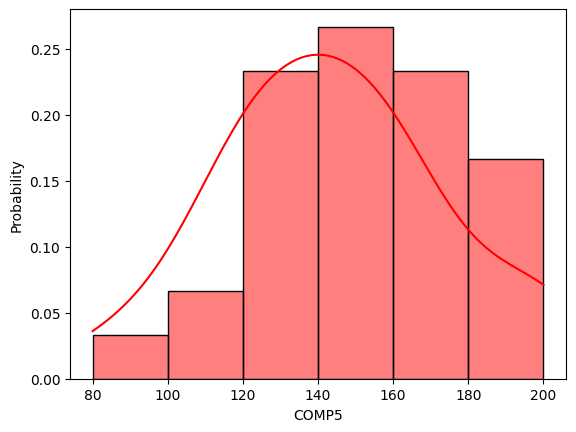

In [23]:
import seaborn as sns
sns.histplot(colegioy, x='COMP5', bins=6, color='red', kde=True, stat='probability');

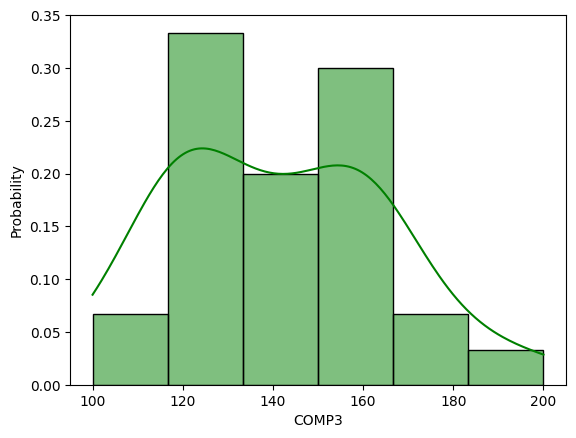

In [25]:

sns.histplot(colegioy, x='COMP3', bins=6, color='green', kde=True, stat='probability');

In [27]:
import scipy.stats as stats
import matplotlib.pyplot as plt

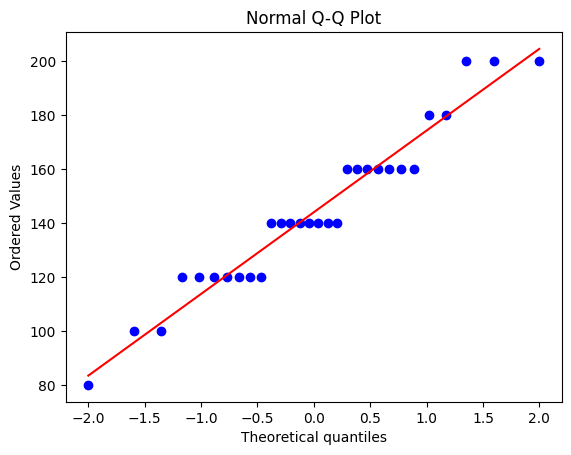

In [28]:
stats.probplot(colegioy['COMP5'], dist='norm',plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

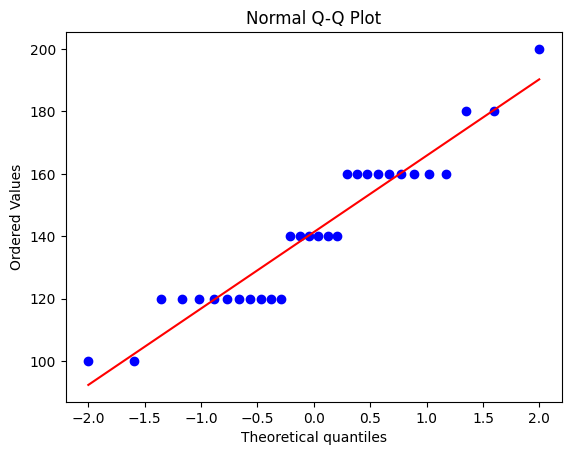

In [29]:
stats.probplot(colegioy['COMP3'], dist='norm',plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

## Homogeneidade das variâncias (HOMOCEDASTICIDADE)

VARIÂNCIA DOS ERROS CONSTANTES

H0 = variância homogêneas: p> 0.05

Ha = variância não homogênea: p<= 0.05

In [30]:
# Teste de Levene
from scipy.stats import levene

In [31]:
stat, p= levene(colegioy.COMP3, colegioy.COMP5, center='mean')
print('Estatística de teste:{}'.format(stat.round(2)))
print('p-valor:{}'.format(p.round(10)))

Estatística de teste:0.61
p-valor:0.4382667191


In [32]:
# Antes de faze o TESTE t-student temos que passar por todos esses passos anteriores!

## **TESTE t-student**

###Comparação das Médias das notas dos componentes 3 e 5 da redação do colégio Y.

H0= NÃO HÁ DIFENRENÇA ENTRE AS MÉDIAS DOS COMPONENTES: p>0.05

Ha= HÁ DIFENRENÇA ENTRE AS MÉDIAS DOS COMPONENTES: p<= 0.05

In [33]:
import scipy.stats as stats

In [39]:
stat, p =stats.ttest_ind(colegioy['COMP3'], colegioy['COMP5'], equal_var=True)
print('Estatística de teste {}'. format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste -0.38
p-valor: 0.7073512583


In [37]:
colegioy.COMP3.describe()

count     30.000000
mean     141.333333
std       24.597916
min      100.000000
25%      120.000000
50%      140.000000
75%      160.000000
max      200.000000
Name: COMP3, dtype: float64

In [38]:
colegioy.COMP5.describe()

count     30.000000
mean     144.000000
std       29.896373
min       80.000000
25%      120.000000
50%      140.000000
75%      160.000000
max      200.000000
Name: COMP5, dtype: float64

## **INTERPRETAÇÃO**

### Teste Estatístico: -0,38
### p_valor: = 0,707

### Conclusão: Estatisticamente, com intervalo de confiança de 95%, a média do componente 3 de redação não é diferente da média do componente 5 com relação ao colégio Y.